In [91]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [92]:
logo = cv2.imread("logo.png", cv2.IMREAD_UNCHANGED)

trump = cv2.imread("trump.jpg", cv2.IMREAD_UNCHANGED)

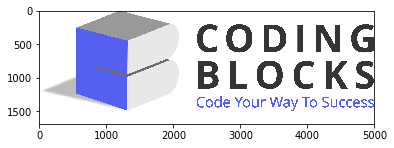

In [93]:
plt.imshow(logo)

In [94]:
logo_rgba = cv2.cvtColor(logo, cv2.COLOR_BGRA2RGBA)
trump_rgb = cv2.cvtColor(trump, cv2.COLOR_BGR2RGB)

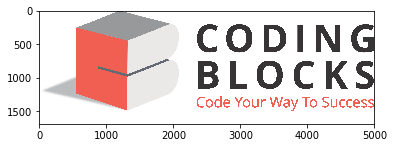

In [95]:
plt.imshow(logo_rgba)

In [96]:
logo_rgba.shape

(1686, 5000, 4)

In [97]:
alpha = logo[:, :, 3]

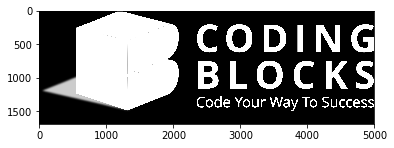

In [98]:
plt.imshow(alpha, cmap="gray")

In [99]:
logo_small = cv2.resize(logo_rgba, (500, 168))

In [100]:
print(logo.shape, trump.shape)

(1686, 5000, 4) (1420, 2000, 3)


In [101]:
logo_small.shape

(168, 500, 4)

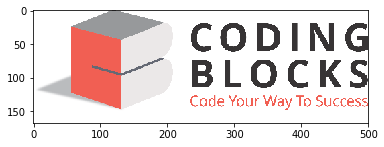

In [102]:
plt.imshow(logo_small)

In [103]:
x, y, w, h = 0, 0, logo_small.shape[1], logo_small.shape[0]

trump_cut = trump_rgb[y:y+h, x:x+w]

In [104]:
trump_cut.shape

(168, 500, 3)

In [105]:
logo_small.shape

(168, 500, 4)

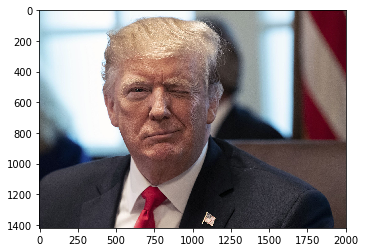

In [106]:
plt.imshow(trump_rgb)

In [107]:
alpha_logo = logo_small[:, :, 3]

In [116]:
for row in range(alpha_logo.shape[0]):
    for col in range(alpha_logo.shape[1]):
        
        if alpha_logo[row, col] >= 155:
            trump_cut[row, col] = logo_small[row, col, :3]

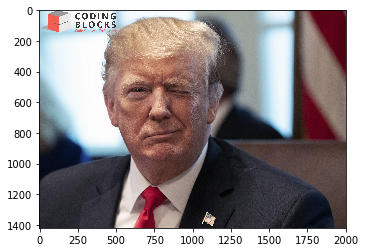

In [117]:
plt.imshow(trump_rgb)

In [118]:
cv2.imwrite( "ad.png", cv2.cvtColor(trump_rgb, cv2.COLOR_RGB2BGR))

True

In [119]:
cv2.imwrite?

Docstring:
imwrite(filename, img[, params]) -> retval
.   @brief Saves an image to a specified file.
.   
.   The function imwrite saves the image to the specified file. The image format is chosen based on the
.   filename extension (see cv::imread for the list of extensions). In general, only 8-bit
.   single-channel or 3-channel (with 'BGR' channel order) images
.   can be saved using this function, with these exceptions:
.   
.   - 16-bit unsigned (CV_16U) images can be saved in the case of PNG, JPEG 2000, and TIFF formats
.   - 32-bit float (CV_32F) images can be saved in TIFF, OpenEXR, and Radiance HDR formats; 3-channel
.   (CV_32FC3) TIFF images will be saved using the LogLuv high dynamic range encoding (4 bytes per pixel)
.   - PNG images with an alpha channel can be saved using this function. To do this, create
.   8-bit (or 16-bit) 4-channel image BGRA, where the alpha channel goes last. Fully transparent pixels
.   should have alpha set to 0, fully opaque pixels should have 